# Power Transformer

A statistical technique used to make data more normally distributed or reduce skewness. It helps improve the performance of machine learning models by stabilizing variance and making data behave better in algorithms that assume normality.

**1. Box-Cox Transformation**

The Box-Cox transformation is applied to data that is strictly positive. It transforms the data to make it more normally distributed and can handle skewed data effectively.

**When to Use Box-Cox:**

* **When your data is strictly positive:** Box-Cox only works with positive data.
* **When your data is highly skewed:** If your data is skewed to the left or right (asymmetrical), Box-Cox can make it more normal.
* **When your model benefits from normality:** If you're using models like linear regression, which assume normal distribution, Box-Cox is useful.

**2. Yeo-Johnson Transformation**

The Yeo-Johnson transformation is similar to Box-Cox, but with one major difference: it works for both positive and negative data. This makes it more flexible.

**When to Use Yeo-Johnson:**
    
* **When your data contains both positive and negative values:** Yeo-Johnson is more flexible because it handles data that includes negative values.
* **When your data is skewed:** Like Box-Cox, Yeo-Johnson is used to reduce skewness and make the data more normal.
* **When normality improves model performance:** Models like regression, neural networks, or any model that assumes normality benefit from this transformation.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/Machine Learning/Datasets/concrete_data.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314848

In [10]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

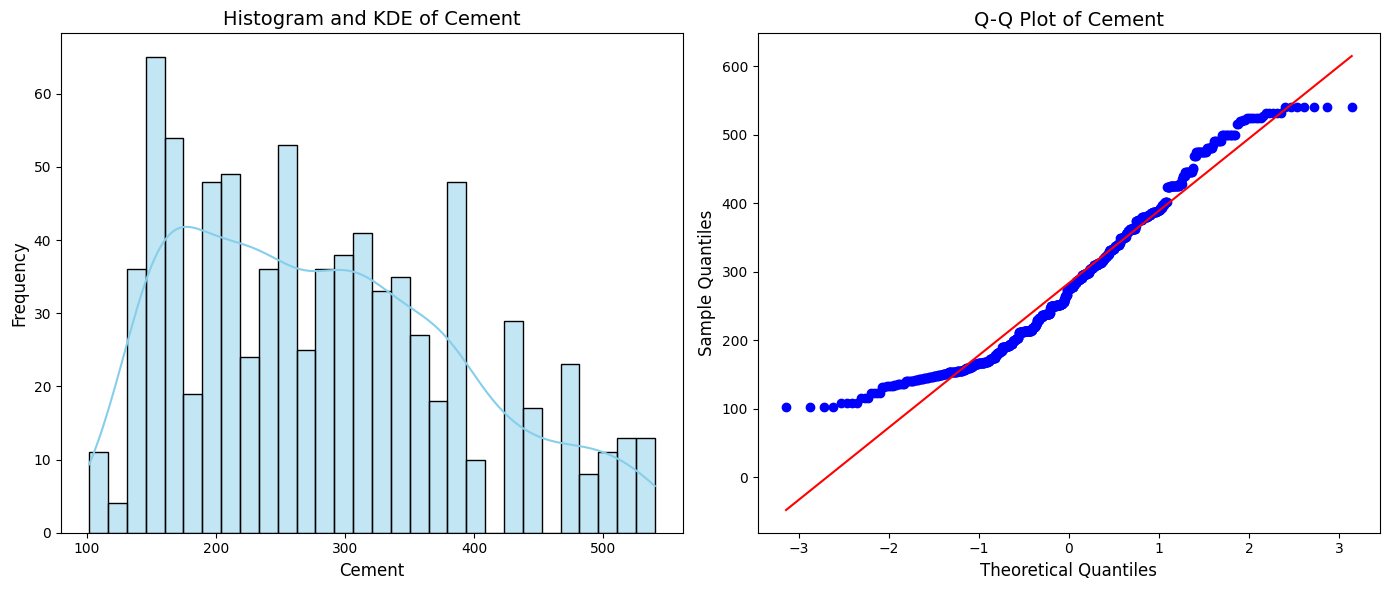

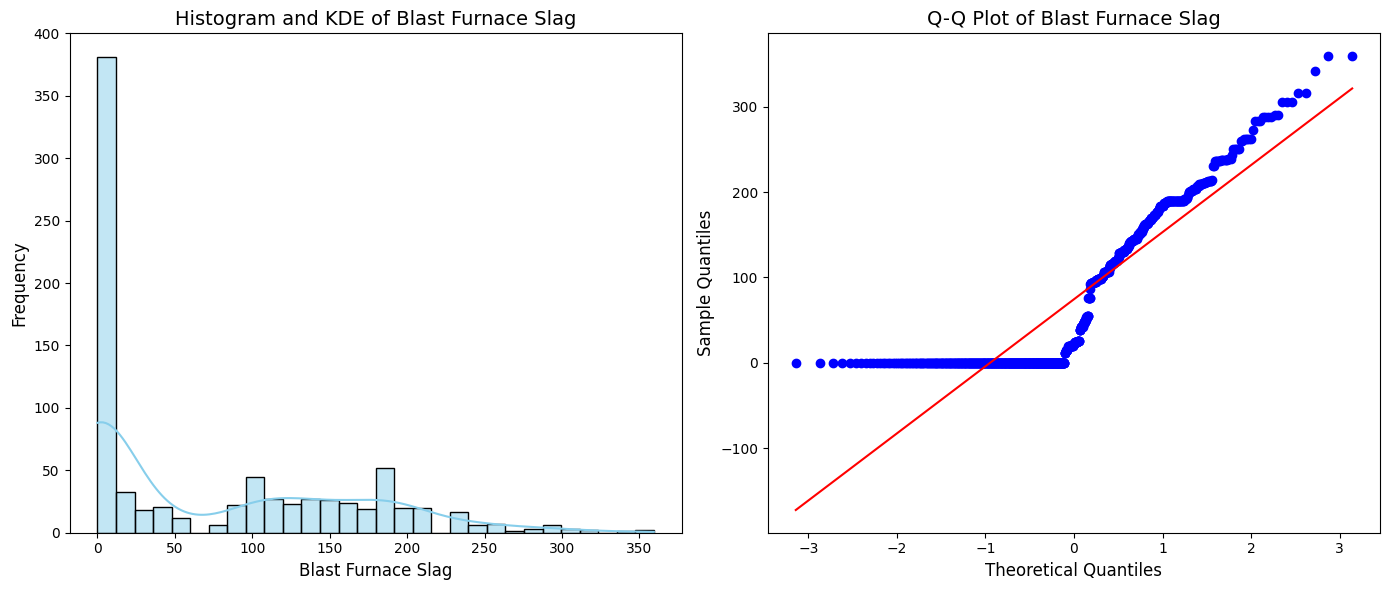

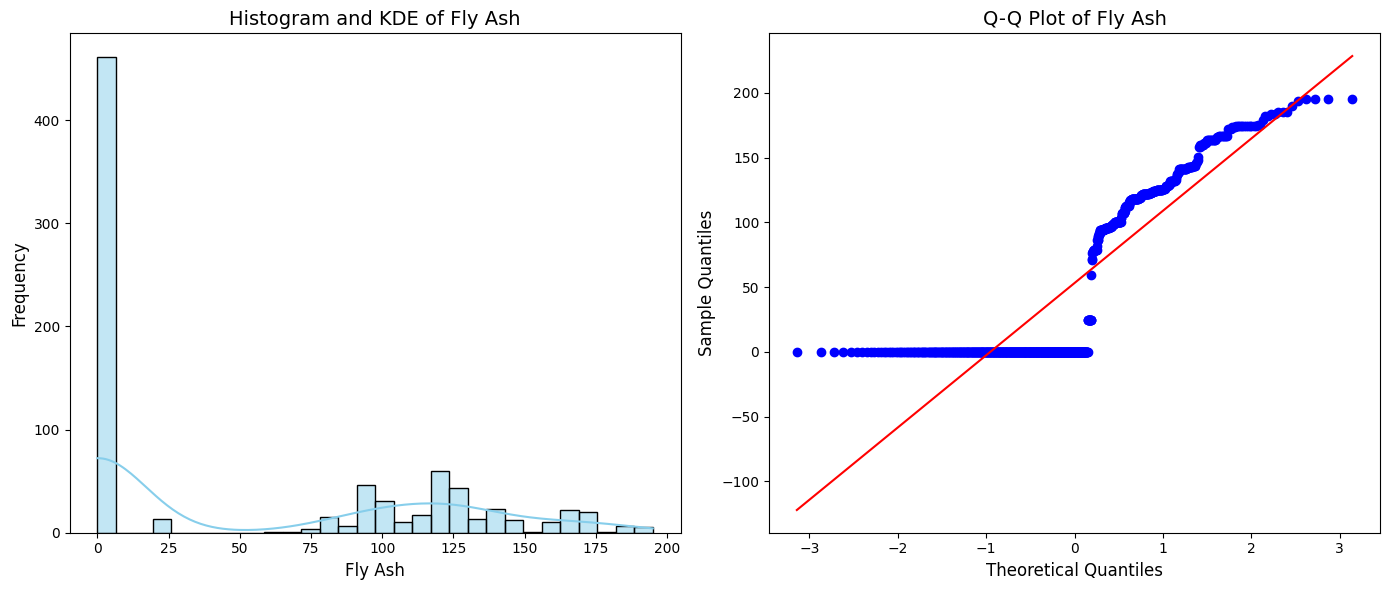

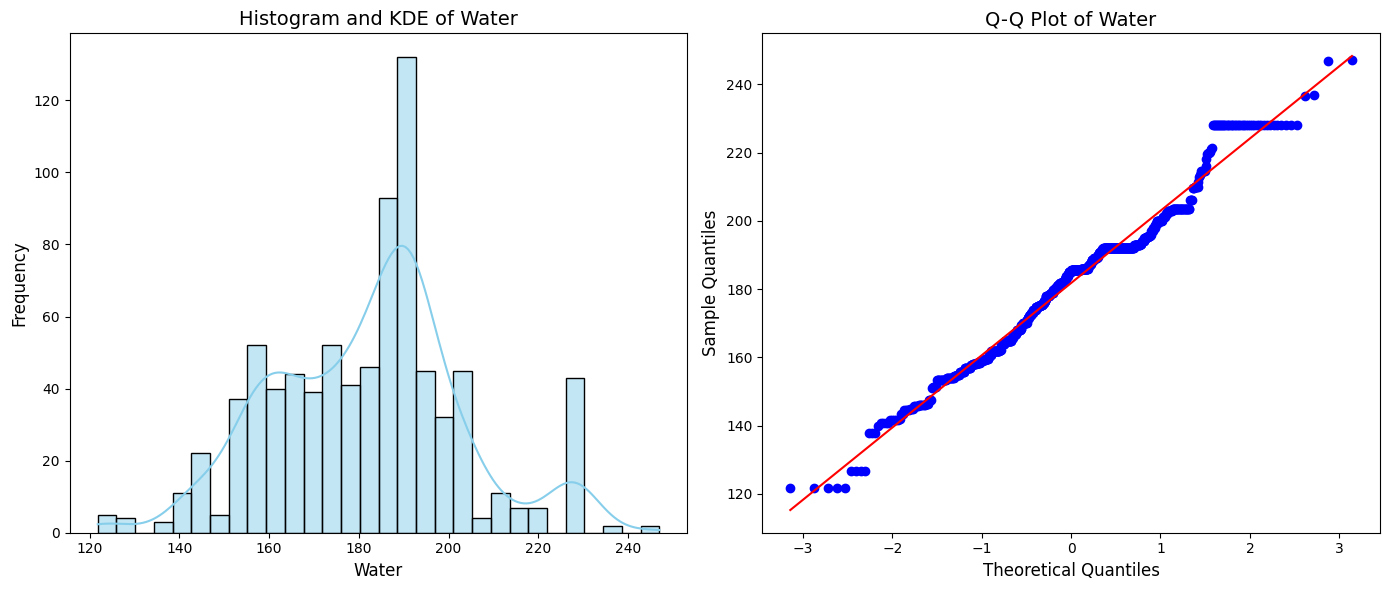

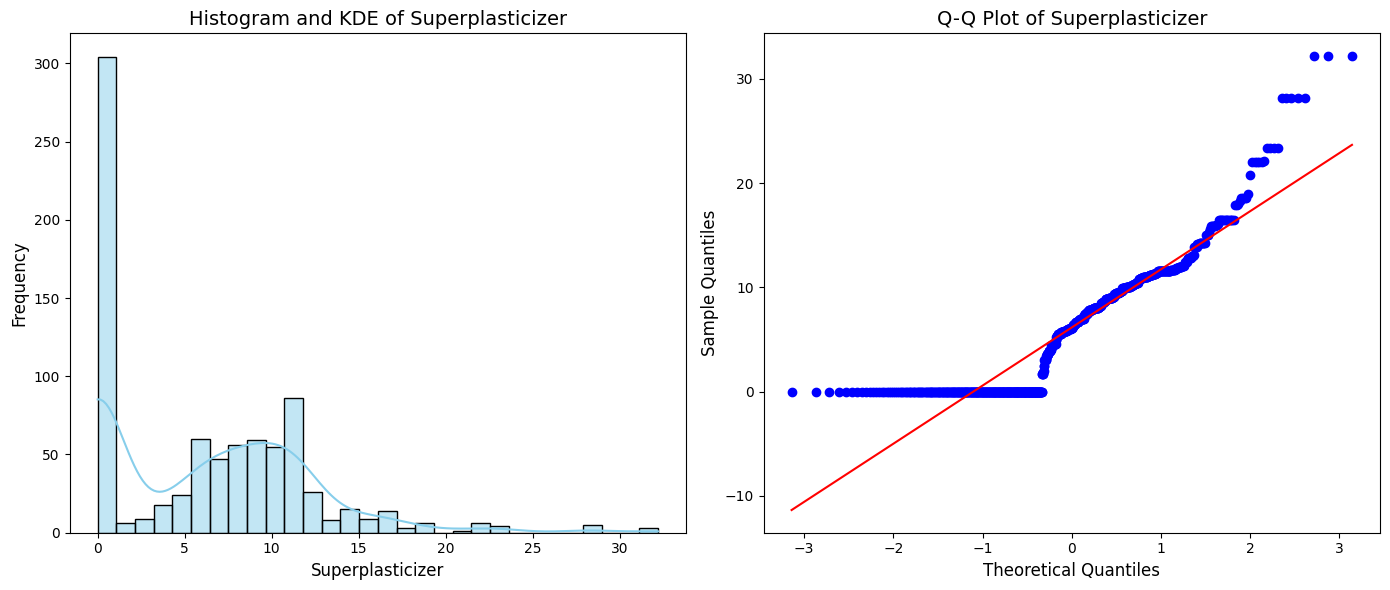

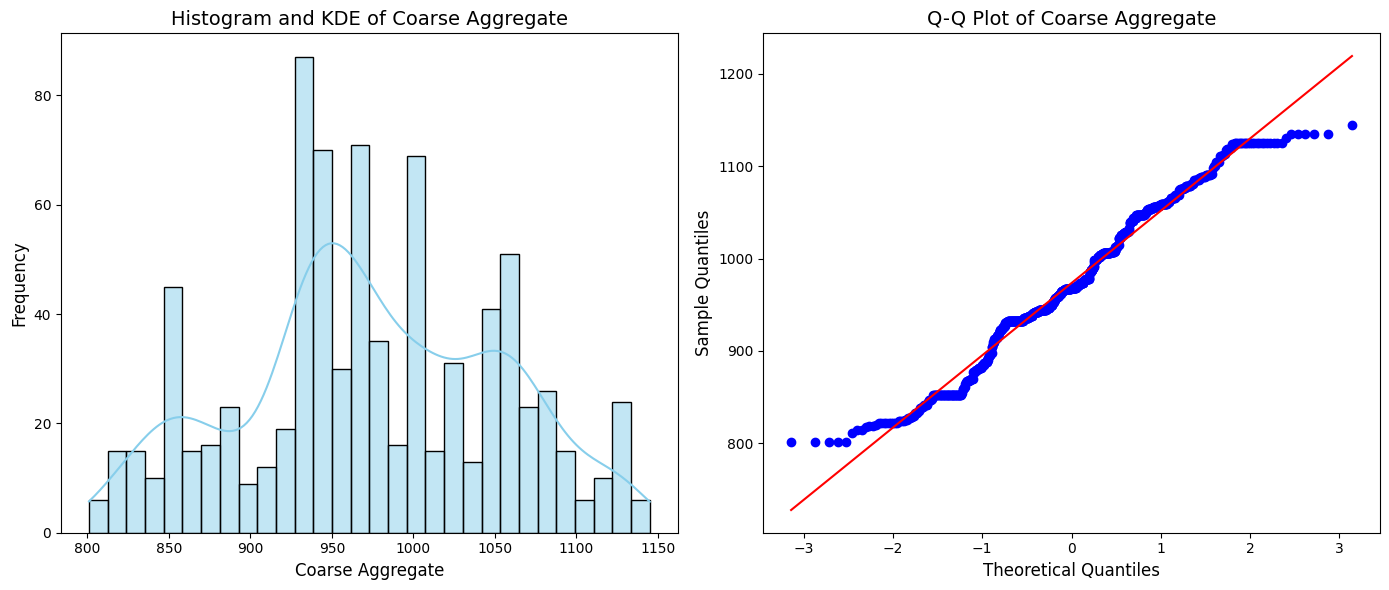

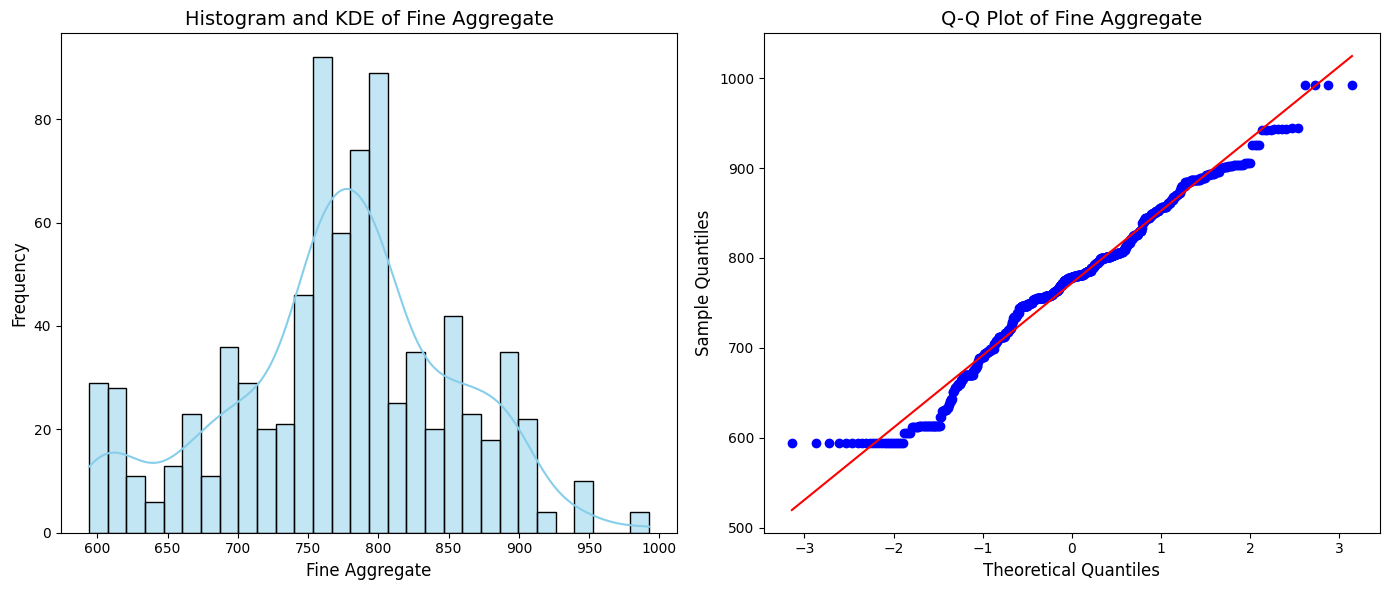

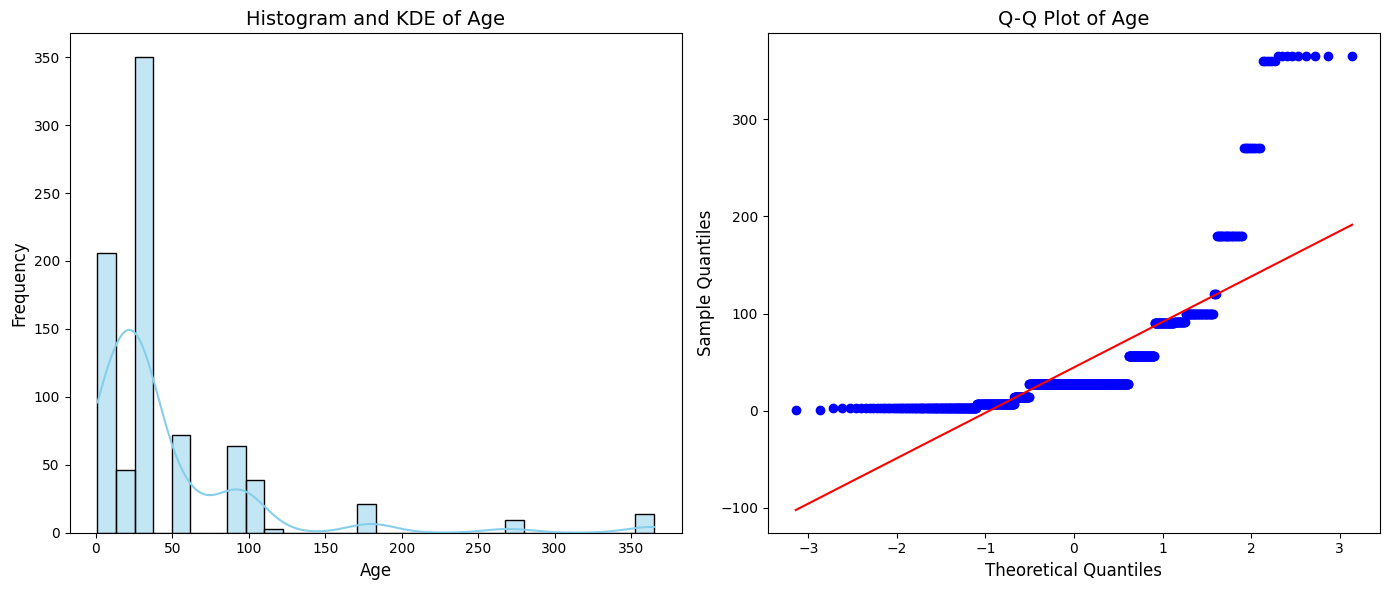

In [11]:
for col in X_train.columns:
    plt.figure(figsize=(14, 6))  # Increased the figure height for better clarity

    # Plot histogram with kernel density estimate (KDE) using histplot
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram and KDE of {col}', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot Q-Q plot to check for normality
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}', fontsize=14)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

### Apply Box-Cox Transformation

In [18]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (only for positive values)
pt = PowerTransformer(method='box-cox')

# Fit the transformation on training data and apply it
X_train_boxcox = X_train.copy()
X_test_boxcox = X_test.copy()

for col in X_train.columns:
    if (X_train[col] <= 0).any():
        X_train[col] = X_train[col] - X_train[col].min() + 1  
        X_test[col] = X_test[col] - X_test[col].min() + 1

    else:
        print(f"Column {col} has non-positive values, skipping Box-Cox transformation")

Column Cement has non-positive values, skipping Box-Cox transformation
Column Water has non-positive values, skipping Box-Cox transformation
Column Coarse Aggregate has non-positive values, skipping Box-Cox transformation
Column Fine Aggregate has non-positive values, skipping Box-Cox transformation
Column Age has non-positive values, skipping Box-Cox transformation


In [19]:
# Now you can apply your regression model to the transformed data
lr = LinearRegression()
lr.fit(X_train_boxcox, y_train)
y_pred_boxcox = lr.predict(X_test_boxcox)
r2_boxcox = r2_score(y_test, y_pred_boxcox)
print("R2 score after Box-Cox transformation:", r2_boxcox)

R2 score after Box-Cox transformation: 0.6275531792314848


In [20]:
# Cross-validation
cross_val_score_boxcox = np.mean(cross_val_score(lr, X_train_boxcox, y_train, scoring='r2'))
print("Cross-validation R2 score after Box-Cox transformation:", cross_val_score_boxcox)

Cross-validation R2 score after Box-Cox transformation: 0.5946055391992532


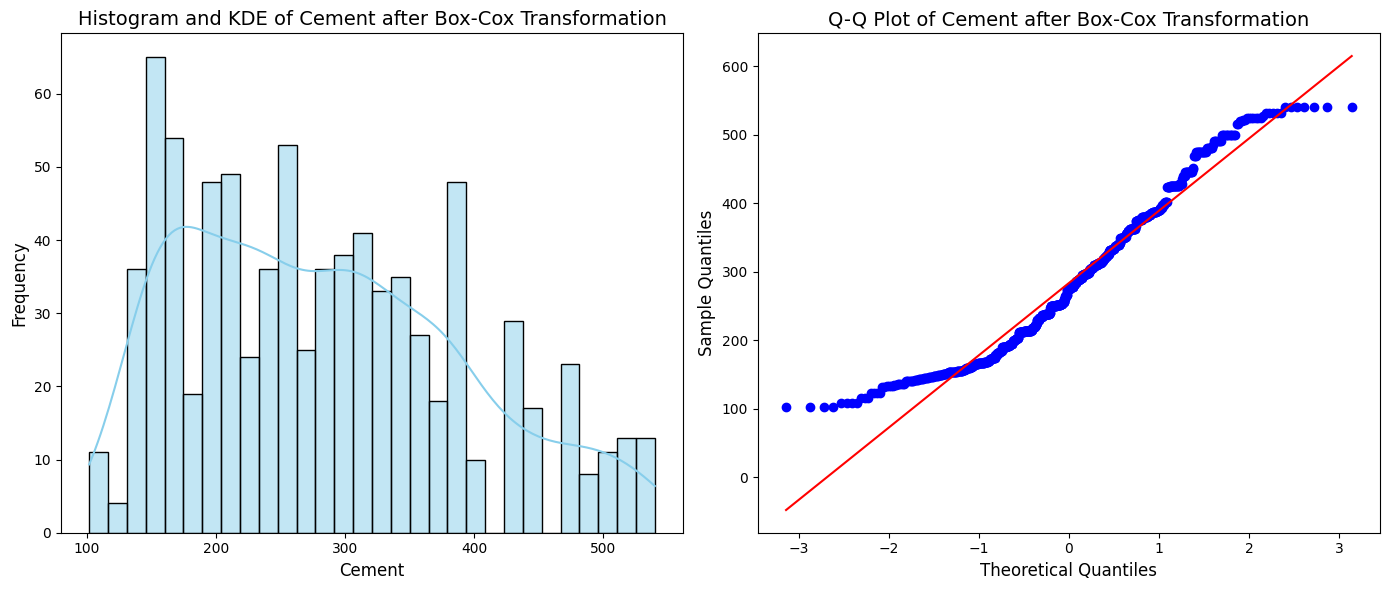

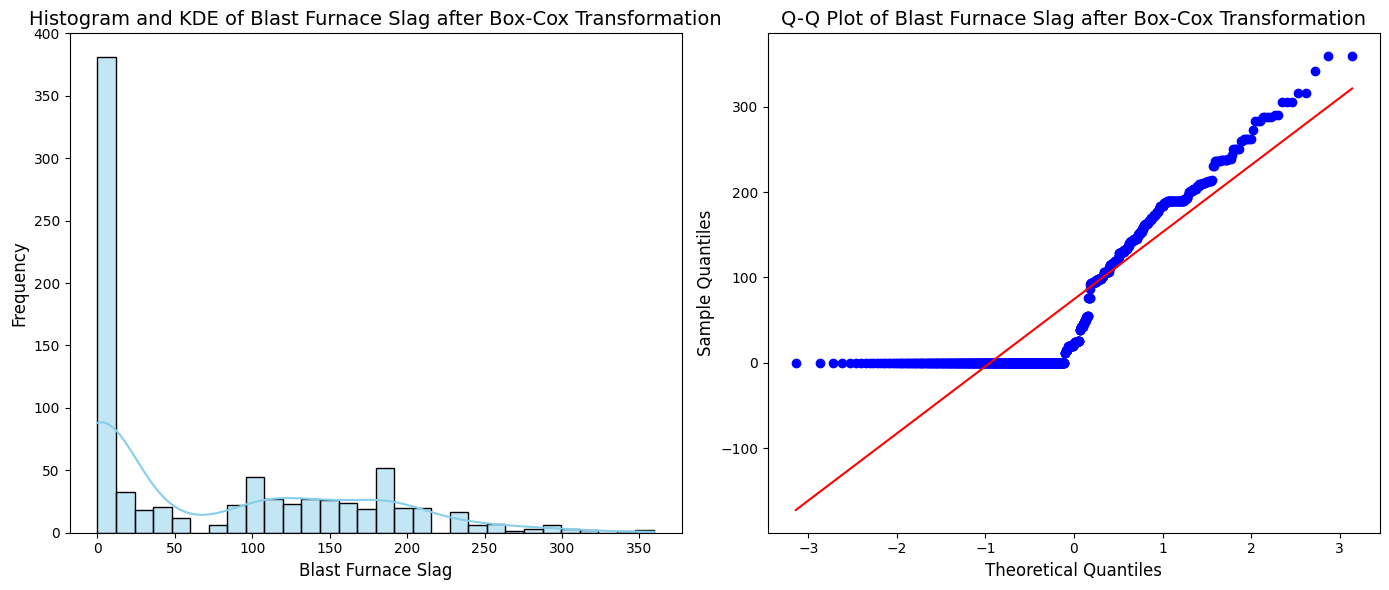

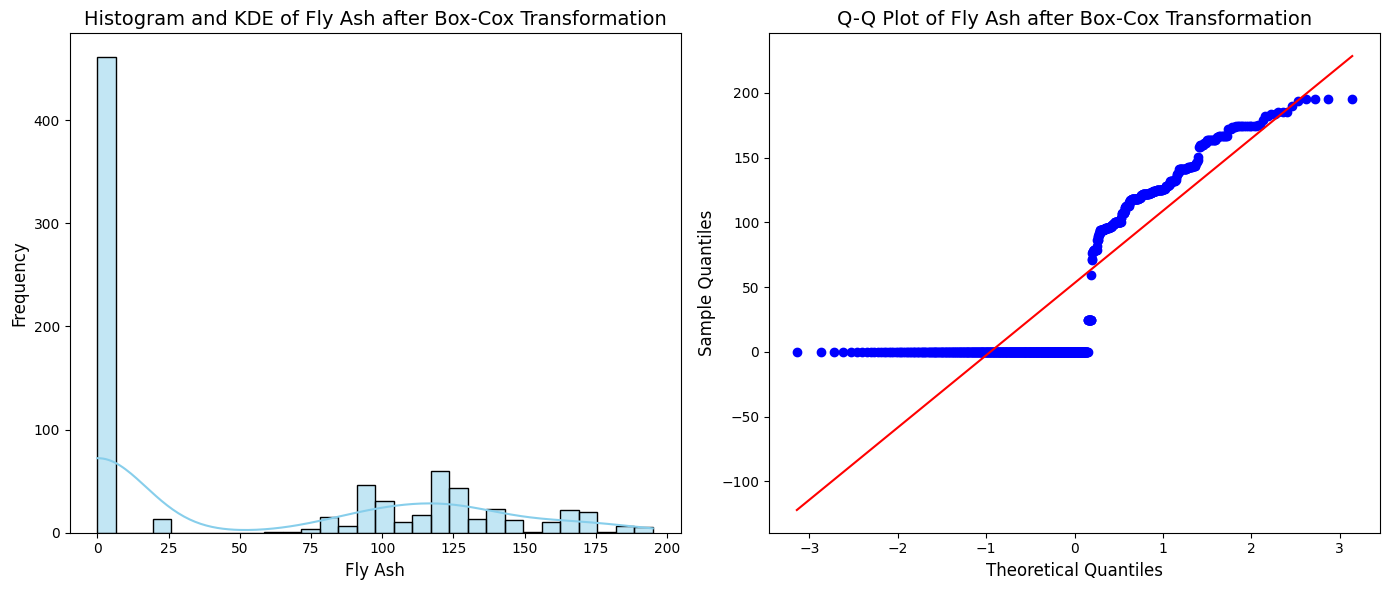

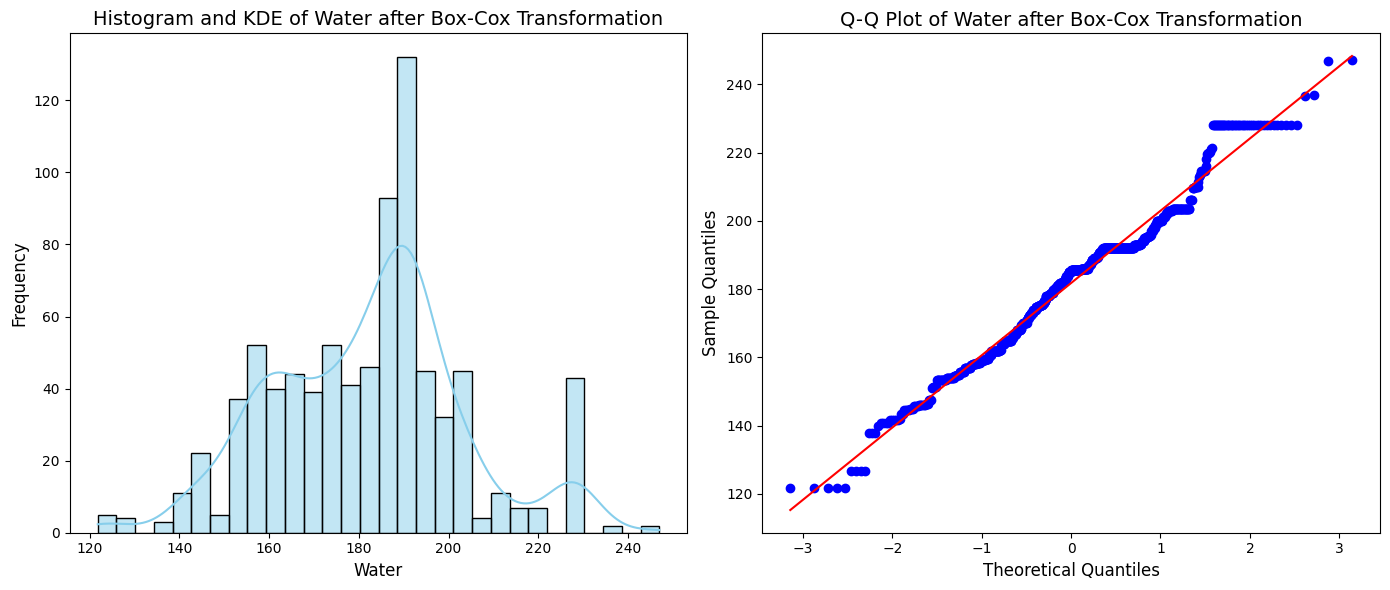

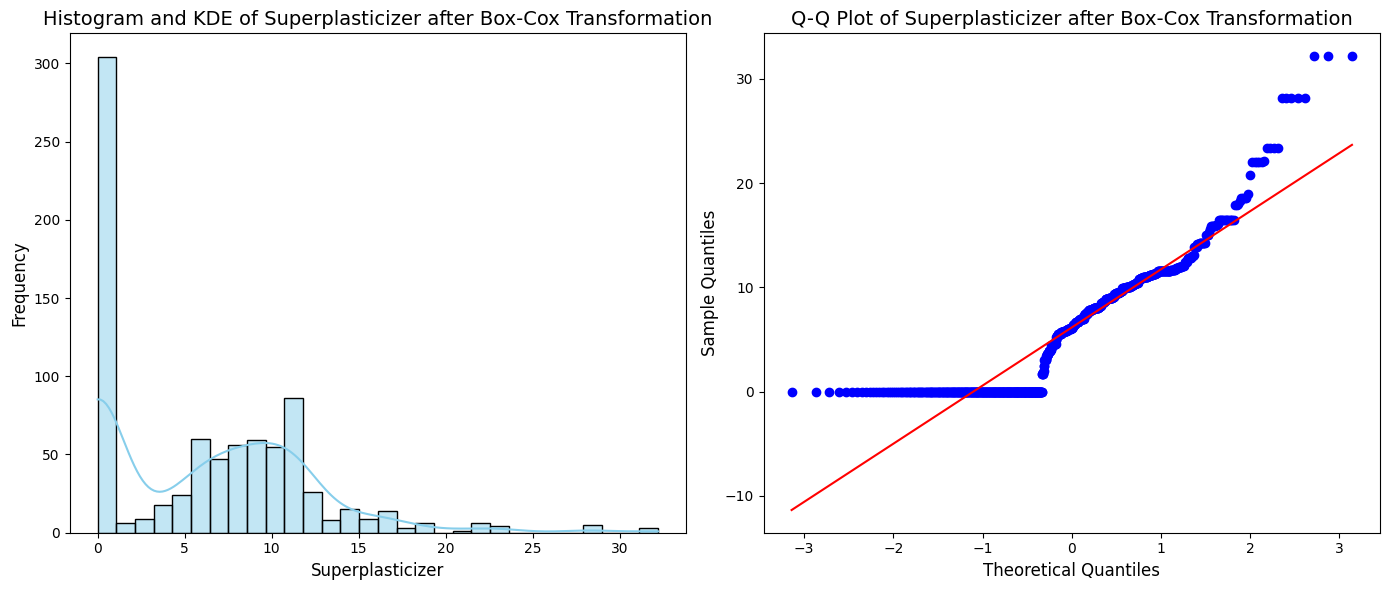

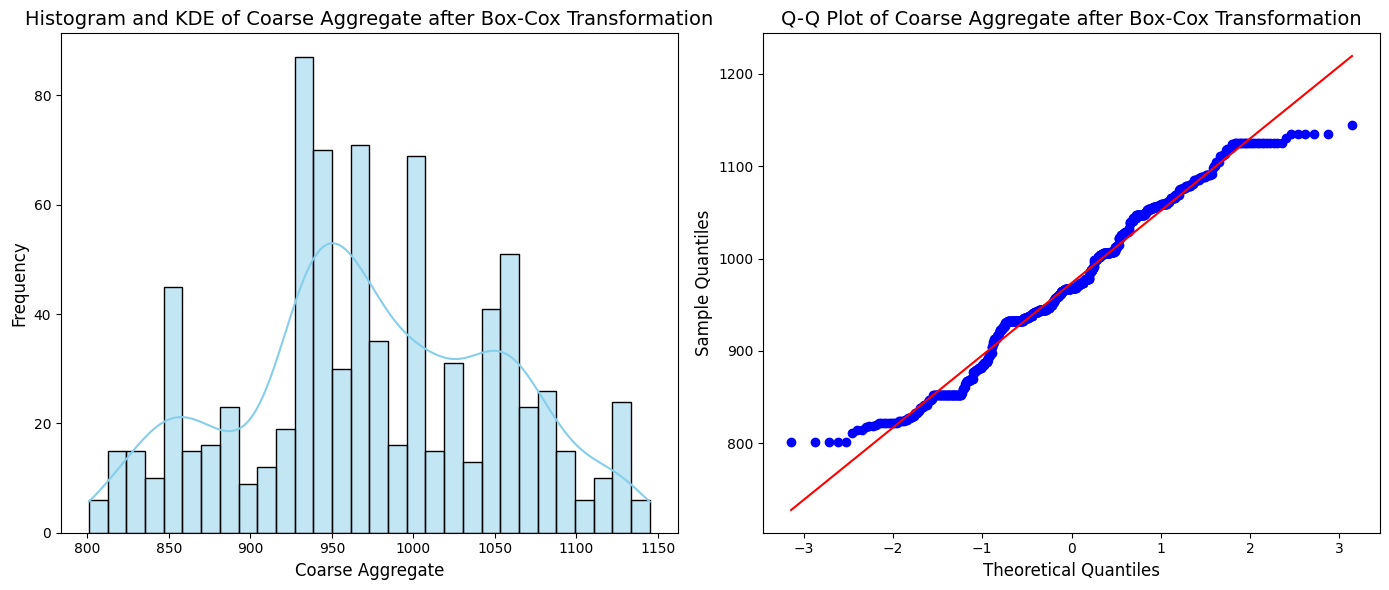

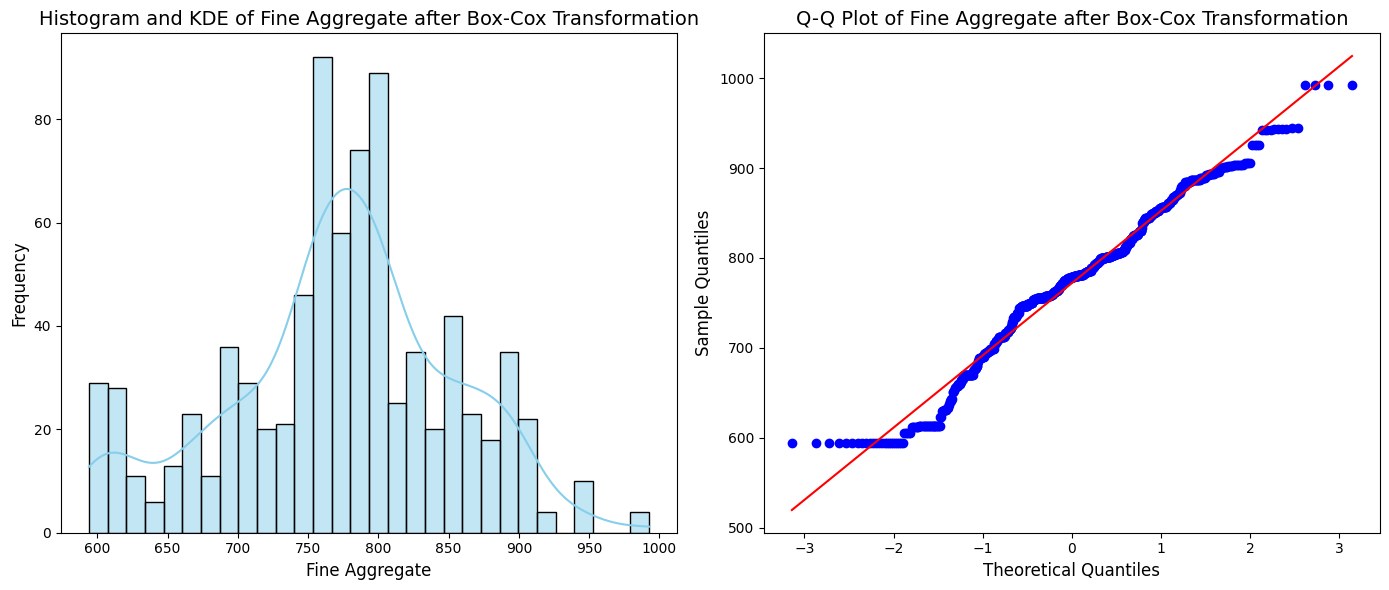

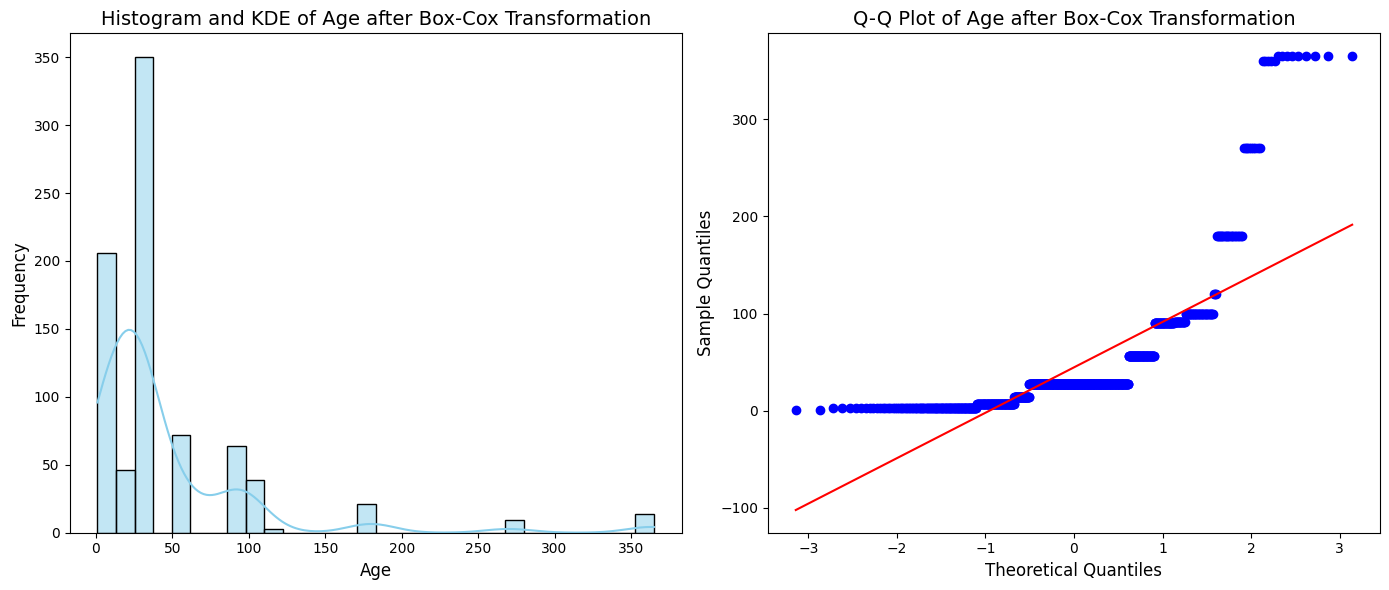

In [21]:
# Plot histograms and Q-Q plots after Box-Cox transformation
for col in X_train_boxcox.columns:
    plt.figure(figsize=(14, 6))

    # Plot histogram with KDE after transformation
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_boxcox[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram and KDE of {col} after Box-Cox Transformation', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot Q-Q plot after transformation
    plt.subplot(1, 2, 2)
    stats.probplot(X_train_boxcox[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} after Box-Cox Transformation', fontsize=14)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)

    plt.tight_layout()
    plt.show()

### Apply Yeo-Johnson Transformation

In [22]:
# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson') 
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

In [23]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred_transformed = lr.predict(X_test_transformed)

In [24]:
# Calculate R2 score
r2_transformed = r2_score(y_test, y_pred_transformed)
print("R2 score after Yeo-Johnson transformation:", r2_transformed)

R2 score after Yeo-Johnson transformation: 0.8174899611120158


In [25]:
# Cross-validation score
cross_val_r2 = np.mean(cross_val_score(lr, X_train_transformed, y_train, scoring='r2'))
print("Cross-validation R2 score after Yeo-Johnson transformation:", cross_val_r2)

Cross-validation R2 score after Yeo-Johnson transformation: 0.7950006572381416


In [26]:
# Visualize histograms and Q-Q plots after transformation
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

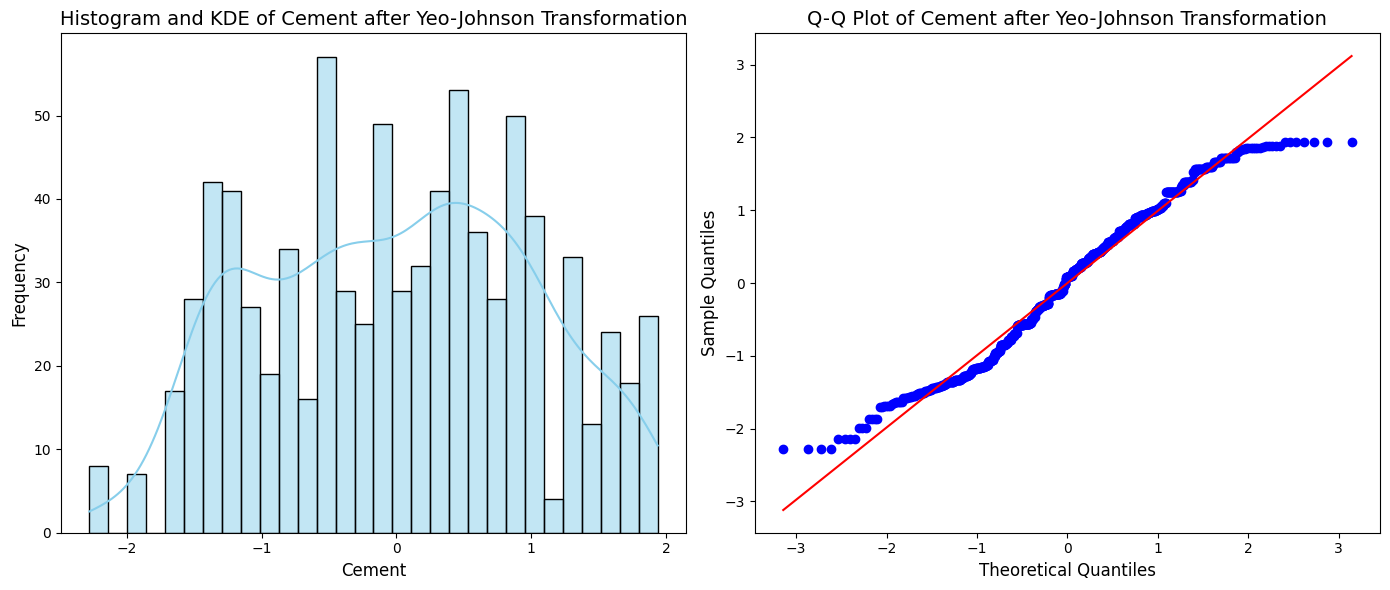

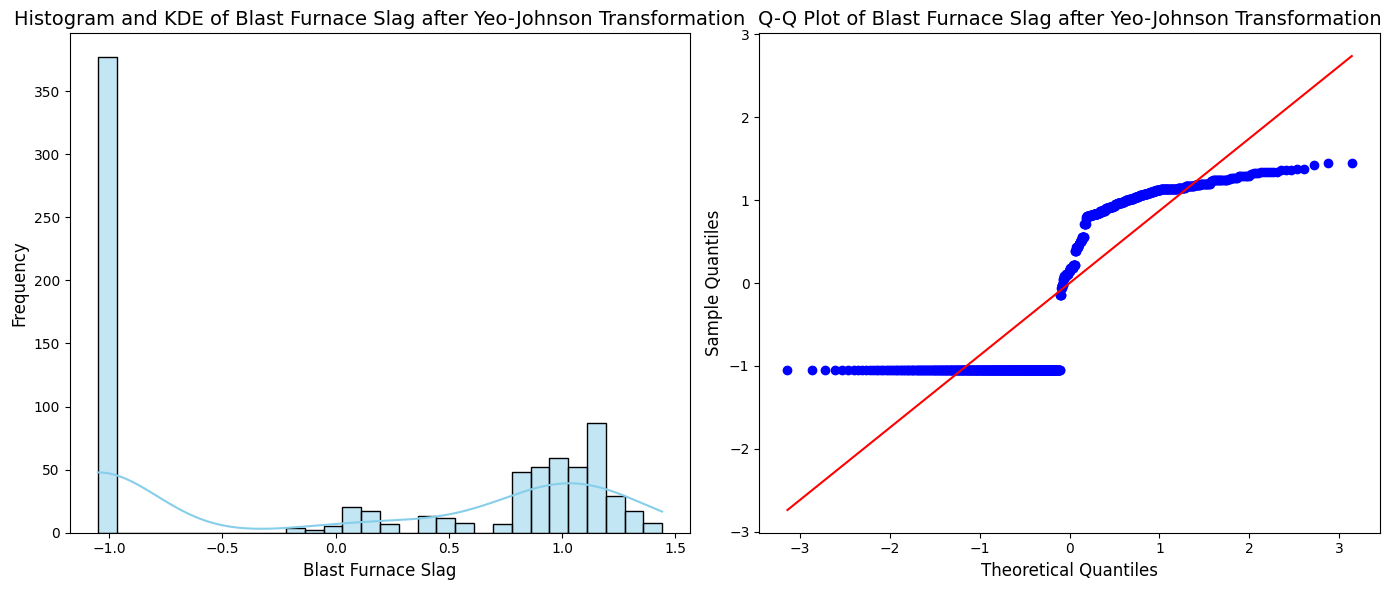

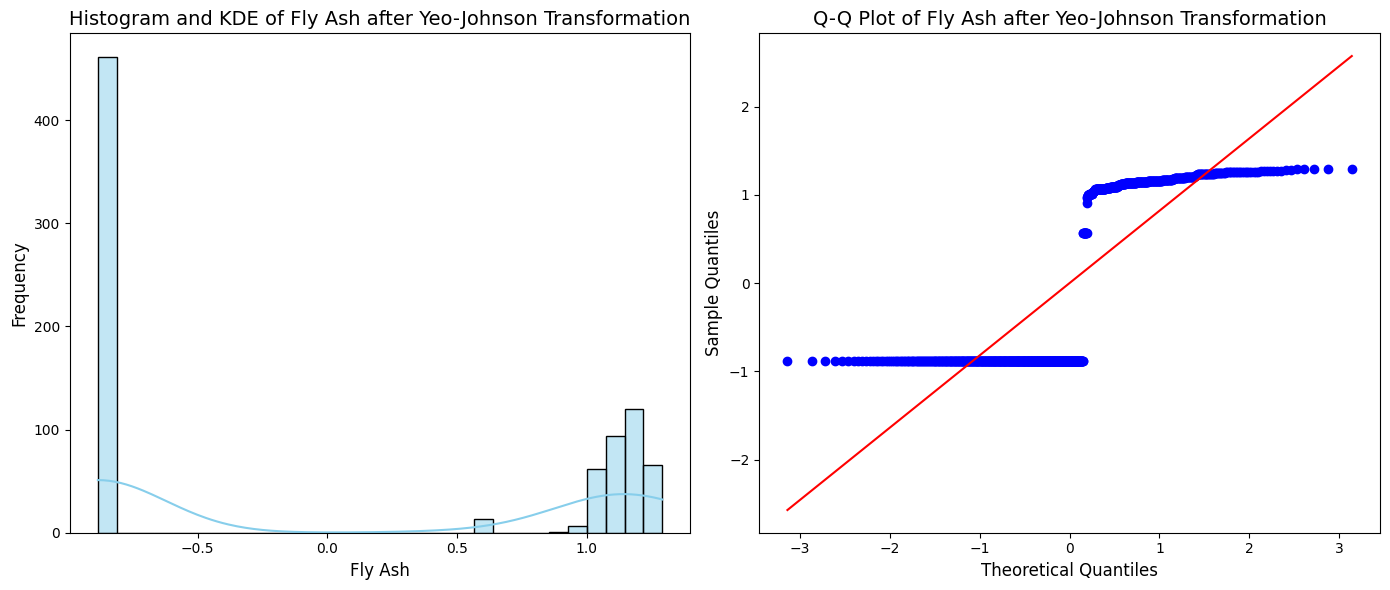

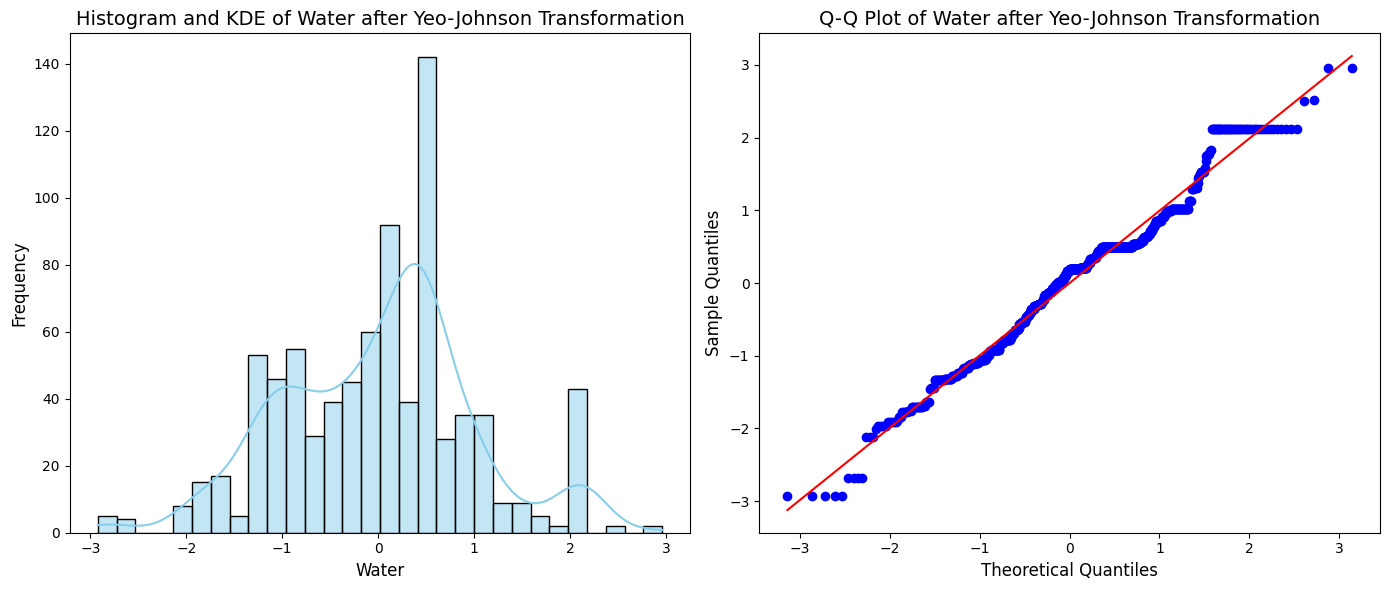

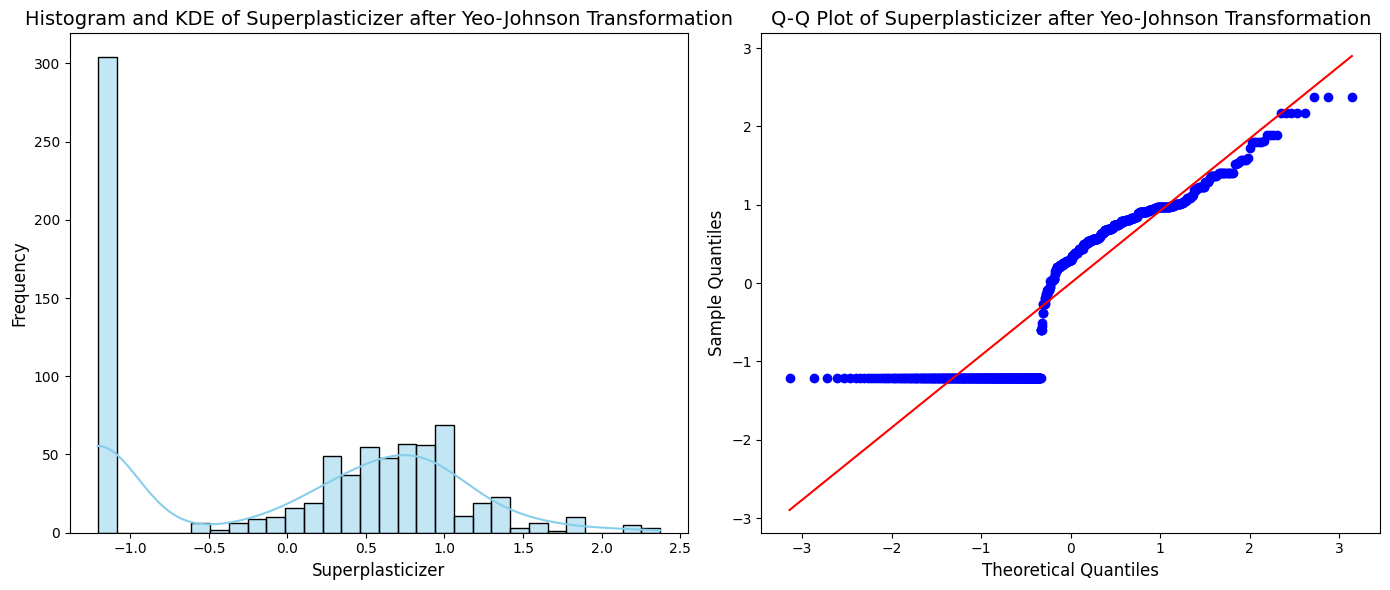

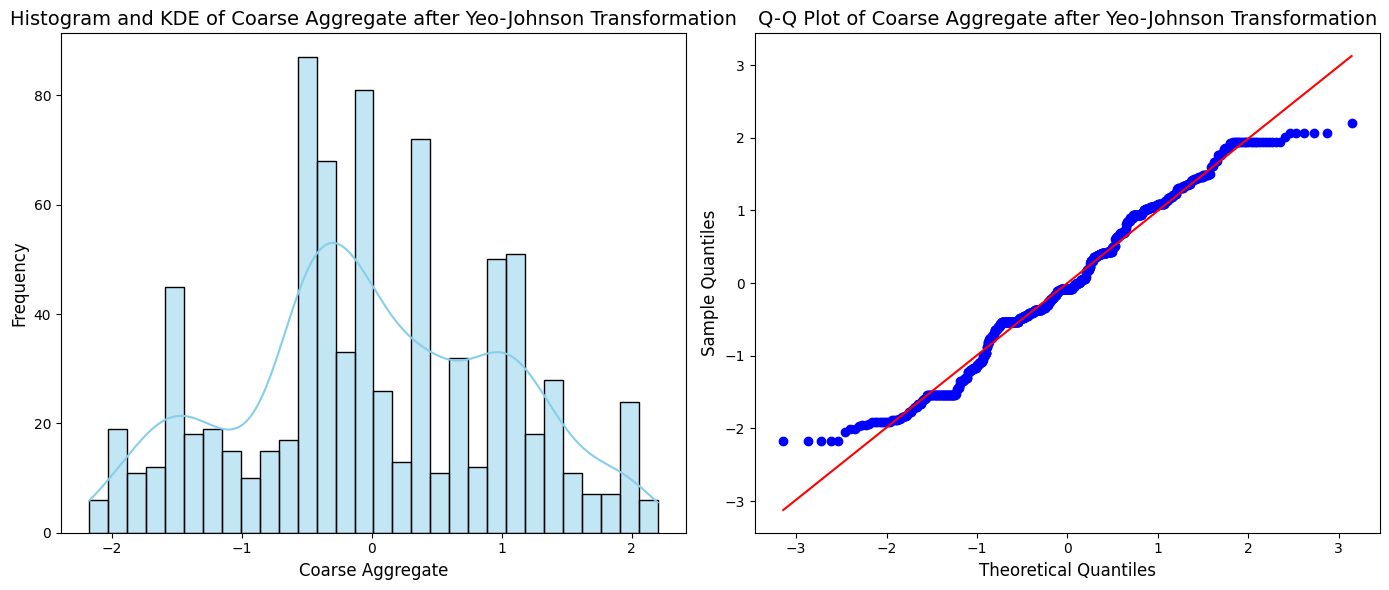

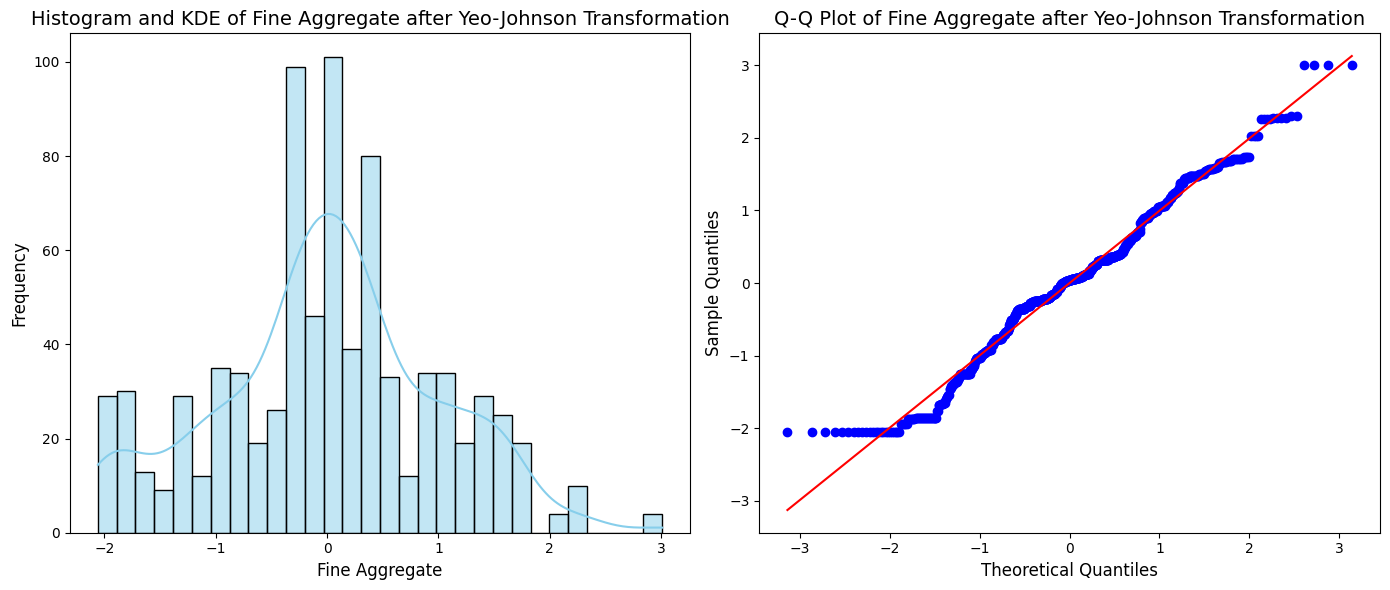

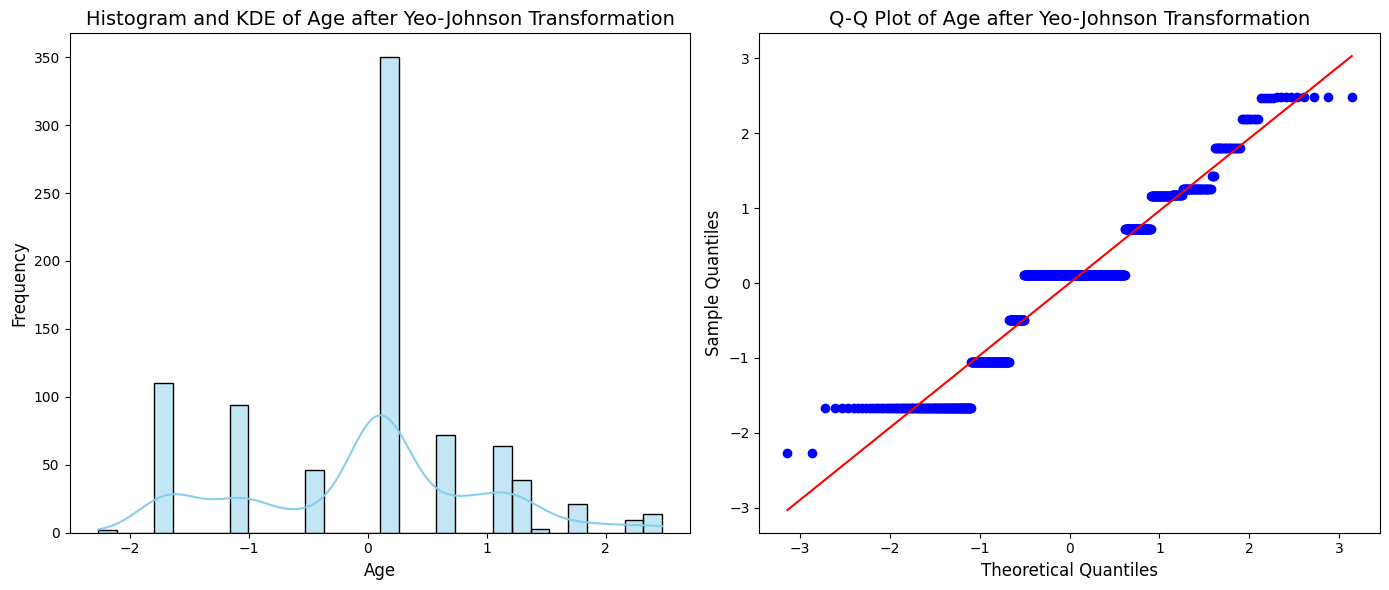

In [27]:
for col in X_train_transformed_df.columns:
    plt.figure(figsize=(14, 6))

    # Plot histogram with KDE after transformation
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_transformed_df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram and KDE of {col} after Yeo-Johnson Transformation', fontsize=14)
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Plot Q-Q plot after transformation
    plt.subplot(1, 2, 2)
    stats.probplot(X_train_transformed_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} after Yeo-Johnson Transformation', fontsize=14)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)

    plt.tight_layout()
    plt.show()